# Explore Redshift

In [1]:
!pip install -q SQLAlchemy==1.3.13

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Settings
redshift_username = 'dsoaws'
redshift_pw = '<password>'
redshift_host = '<host>'
redshift_database = 'dsoaws'
redshift_port = '5439'
table_name = 'amazon_reviews_tsv'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(redshift_username, redshift_pw, redshift_host, redshift_port, redshift_database))


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


### Showing blazing fast Redshift APPROXIMATE COUNT

In [18]:
%%time
df = pd.read_sql_query("""SELECT approximate count(distinct customer_id)
                                FROM {}
                                GROUP BY product_category""".format(table_name), engine)

CPU times: user 2.36 ms, sys: 0 ns, total: 2.36 ms
Wall time: 5.68 s


In [19]:
%%time
df = pd.read_sql_query("""SELECT count(distinct customer_id)
                                FROM {}
                                GROUP BY product_category""".format(table_name), engine)

CPU times: user 3.09 ms, sys: 0 ns, total: 3.09 ms
Wall time: 29.8 s


### Showing visualization

In [26]:
df = pd.read_sql_query("""SELECT product_category,
                COUNT(star_rating) AS count_star_rating
                FROM {}
                GROUP BY product_category
                ORDER BY count_star_rating DESC""".format(table_name), engine)

In [27]:
df.head()

,product_category,count_star_rating
0,Books,19531329
1,Digital_Ebook_Purchase,17622415
2,Wireless,9002021
3,PC,6908554
4,Home,6221559


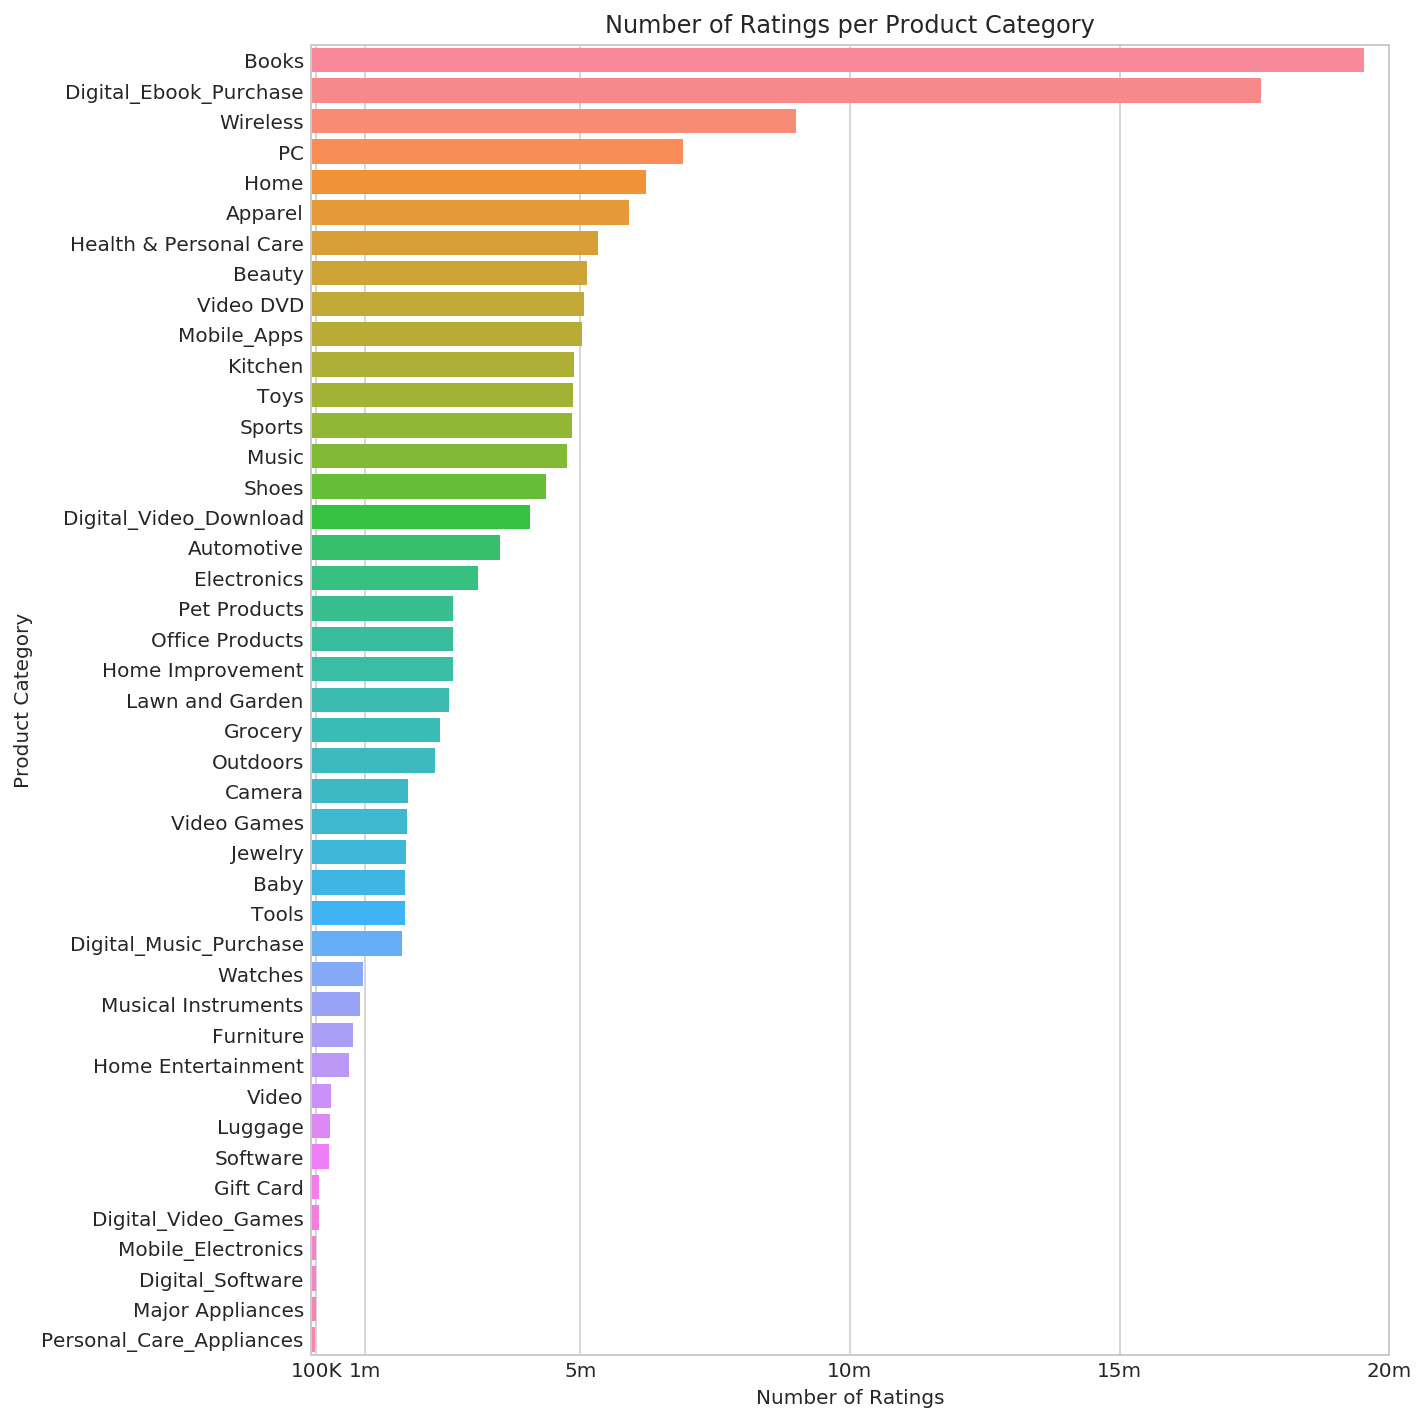

In [28]:
# Set size and style to use
plt.figure(figsize=(10,10))
plt.style.use('seaborn-whitegrid')

# Create Seaborn barplot
barplot = sns.barplot(y='product_category', x='count_star_rating', data = df, saturation=1)

# Set title
plt.title("Number of Ratings per Product Category")

# Set x-axis ticks to match scale from 10mio reviews to 20mio reviews
plt.xticks([100000, 1000000, 5000000, 10000000, 15000000, 20000000], ['100K', '1m', '5m', '10m','15m','20m'])
plt.xlim(0, 20000000)
plt.xlabel("Number of Ratings")
plt.ylabel("Product Category")

plt.tight_layout()

# Export plot if needed
# plt.savefig('ratings_per_category.png', dpi=300)

# Show the barplot
plt.show(barplot)